In [1]:
import re
import matplotlib.pyplot as plt
from datetime import datetime

# Caminho do arquivo
file_path = "dados.txt"  # Certifique-se de colocar o caminho correto

# Ler o conteúdo do arquivo
with open(file_path, "r") as file:
    content = file.readlines()

In [2]:
# Listas para armazenar os valores de throughput e fila média
throughput_red = []
avg_queue_red = []
throughput_drop_tail = []
avg_queue_drop_tail = []

for line in content:
    if "ID:5" in line:
        throughput_match = re.search(r"throughput: ([\d\.]+)", line)
        avg_queue_match = re.search(r"avg_queue: ([\d\.]+)", line)
        
        if throughput_match and avg_queue_match:
            throughput_value = float(throughput_match.group(1))
            avg_queue_value = float(avg_queue_match.group(1))
            
            if "RED" in line:
                throughput_red.append(throughput_value)
                avg_queue_red.append(avg_queue_value)
            else:
                throughput_drop_tail.append(throughput_value)
                avg_queue_drop_tail.append(avg_queue_value)


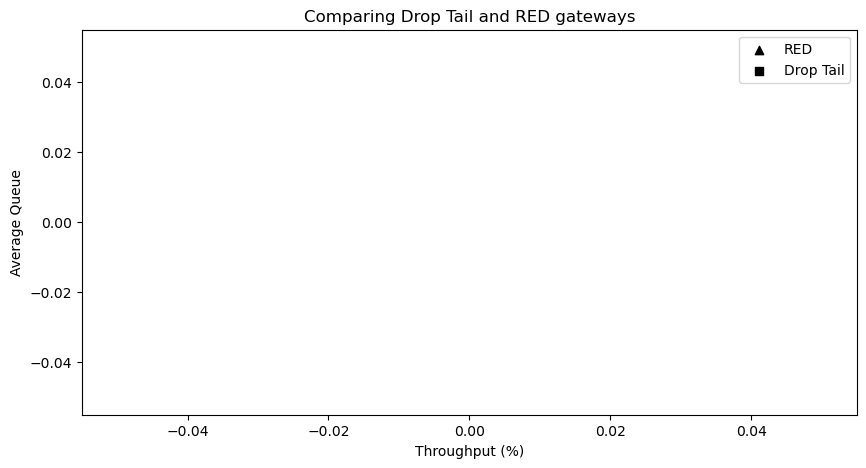

In [3]:
# Criar o gráfico
plt.figure(figsize=(10, 5))
plt.scatter(throughput_red, avg_queue_red, marker='^', color='black', label='RED')
plt.scatter(throughput_drop_tail, avg_queue_drop_tail, marker='s', color='black', label='Drop Tail')

# Adicionar rótulos e legenda
plt.xlabel("Throughput (%)")
plt.ylabel("Average Queue")
plt.legend()
plt.title("Comparing Drop Tail and RED gateways")

# Mostrar o gráfico
plt.show()